In [9]:
import matplotlib.pyplot as plt
import pandas as pd

from pprint import pprint
from prices.coindesk import btc_interval
from prices.tobtc import tobtc

plt.style.use('ggplot')

ImportError: No module named 'prices'

In [8]:
btc = btc_interval('20170101', '20170119')

NameError: name 'btc_interval' is not defined

In [9]:
btc = btc['bpi']

NameError: name 'btc' is not defined

In [7]:
df = pd.DataFrame(list(btc.items()), columns=['Date', 'USD'])
df

NameError: name 'btc' is not defined

In [5]:
df.max()

Date    2017-01-19
USD        1129.87
dtype: object

In [6]:
df.min()

Date    2017-01-01
USD        775.981
dtype: object

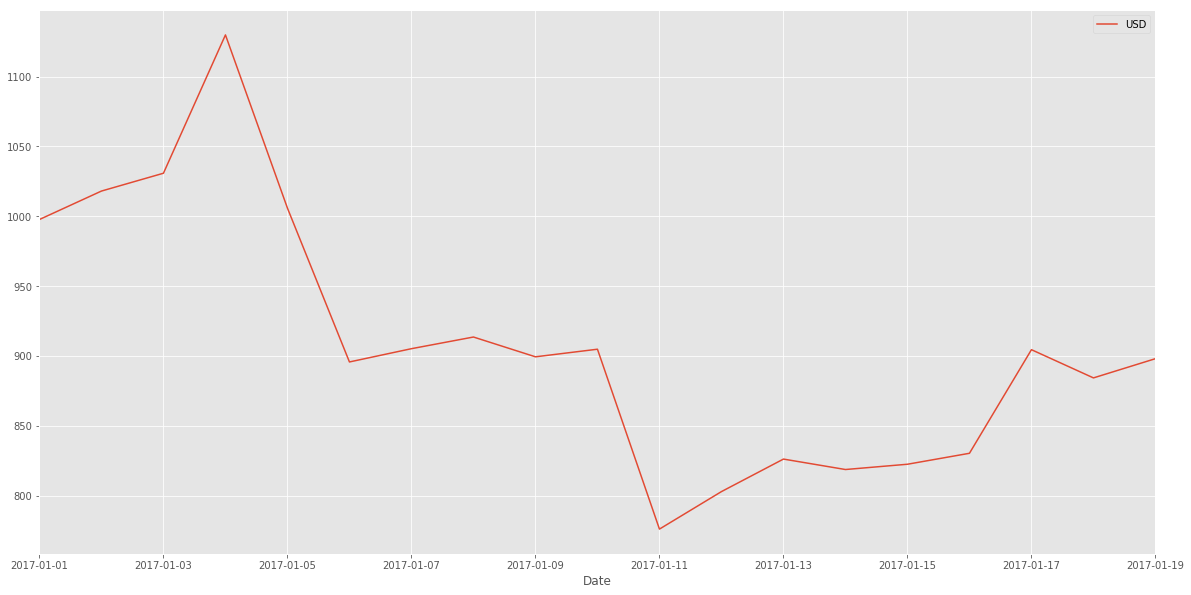

In [7]:
df.plot(x='Date', y='USD', figsize=(20, 10))
plt.show()

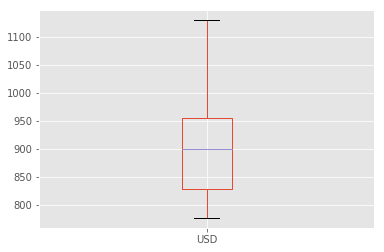

In [8]:
df.plot.box()
plt.show()

In [1]:
percent_change = df['USD'].pct_change()
percent_change = percent_change.fillna(0)
percent_change.plot(figsize=(20, 10))
plt.show()

NameError: name 'df' is not defined

In [10]:
h = df.merge(percent_change.to_frame(), left_index=True, right_index=True)
h.columns = ['Date', 'USD', 'percent_change']
h

,Date,USD,percent_change
0,2017-01-01,997.6888,NaN
1,2017-01-02,1018.0500,0.020408
2,2017-01-03,1030.8175,0.012541
3,2017-01-04,1129.8700,0.096091
4,2017-01-05,1005.8150,-0.109796
5,2017-01-06,895.6700,-0.109508
6,2017-01-07,905.1700,0.010607
7,2017-01-08,913.5238,0.009229
8,2017-01-09,899.3500,-0.015516
9,2017-01-10,904.7925,0.006052


In [11]:
date_inc = h[h['percent_change'] > 0.09]

date_inc['Date']

3    2017-01-04
Name: Date, dtype: object

In [12]:
date_dec = h[h['percent_change'] < -0.09]
date_dec['Date']

4     2017-01-05
5     2017-01-06
10    2017-01-11
Name: Date, dtype: object

In [13]:
from bitcoin_calc import timestamp_convert
t = timestamp_convert(h)
print(t)

{'high': [1483516800], 'low': [1483603200, 1483689600, 1484121600]}


In [14]:
# from reddit_search import reddit_search

# hi = reddit_search('InternationalNews', t['high'])
# lo = reddit_search('InternationalNews', t['low'])

# pprint(lo)

In [15]:
from nyt_get import nyt_bitcoin
from bitcoin_calc import high_percents, low_percents


tlo = nyt_bitcoin(low_percents(h).values.tolist())
pprint(tlo)

{'Battered Bitcoin Slides Another 12 Percent After China Warning': 'http://www.nytimes.com/reuters/2017/01/06/business/06reuters-global-markets-bitcoin.html',
 'Bitcoin Plunges as Much as 20 Percent as Chinese Yuan Soars': 'http://www.nytimes.com/reuters/2017/01/05/business/05reuters-global-markets-bitcoin.html',
 'Bitcoin Slides After China Central Bank Launches Investigation': 'http://www.nytimes.com/reuters/2017/01/11/business/11reuters-markets-bitcoin-pboc.html',
 "Bitcoin Slides as China's Central Bank Launches Checks on Exchanges": 'http://www.nytimes.com/reuters/2017/01/11/business/11reuters-china-bitcoin.html',
 'Bitstamp Adds Ripple Currency XRP to Trading Platform': 'http://www.nytimes.com/reuters/2017/01/10/business/10reuters-blockchain-ripple.html',
 'China Central Bank Urges Rational Investment in Bitcoin': 'http://www.nytimes.com/reuters/2017/01/06/business/06reuters-china-bitcoin.html'}
